In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

In [2]:
def scraped_games_data(site_code,dynamics=None,show = False):
    games_data = []
    i = 0
    j=0
    soup = BeautifulSoup(site_code,'html.parser')
    outcomes = soup.find_all('div', {'class': "sb-event-list__selection__outcome-name ng-star-inserted"})
    odds = soup.find_all('div', {'class': "sb-event-list__selection__outcome-value"})
    size = len(outcomes)/3
    if show:
        print(f'Scraped Outcomes:{len(outcomes)}')
        print(f'Scraped Odds:{len(odds)}')
        vals = []
        s = 0
        while s <= len(outcomes)-2:
            vals.append([outcomes[s].get_text().strip(),odds[s].get_text().strip().replace(',','.'),odds[s+1].get_text().strip().replace(',','.'),outcomes[s+2].get_text().strip(),odds[s+2].get_text().strip().replace(',','.')])
            s+=3        
        games_df = pd.DataFrame(vals, columns = [['Home_team', 'Home_odds', 'Draw_odds', 'Away_team', 'Away_odds']])
        print(games_df)        

    while i <= 3*(size-1):
        game = []
        game.append(outcomes[i].get_text().strip())
        game.append(outcomes[i+2].get_text().strip())
        game.append(float(odds[i].get_text().strip().replace(',','.')))
        game.append(float(odds[i+1].get_text().strip().replace(',','.')))
        game.append(float(odds[i+2].get_text().strip().replace(',','.')))
        if dynamics:
            game.append(dynamics[j])
            game.append(dynamics[j+1])
            j+=2
        games_data.append(game)
        i += 3
    return(games_data)



   Game ID       Date  Country     Competition        Home team    Away team  \
0        1  1/11/2003  England  premier-league           Bolton       Fulham   
1        2  1/11/2003  England  premier-league          Chelsea     Charlton   
2        3  1/11/2003  England  premier-league        Liverpool  Aston Villa   
3        4  1/11/2003  England  premier-league  Manchester City        Leeds   
4        5  1/11/2003  England  premier-league    Middlesbrough  Southampton   

   Home team game number  Away team game number  Trend home team  \
0                     22                     22                5   
1                     23                     22                5   
2                     23                     23                3   
3                     23                     23                8   
4                     23                     23                4   

   Trend away team  ...  Proba_total  Highest proba_outcome  \
0                4  ...         1.12           

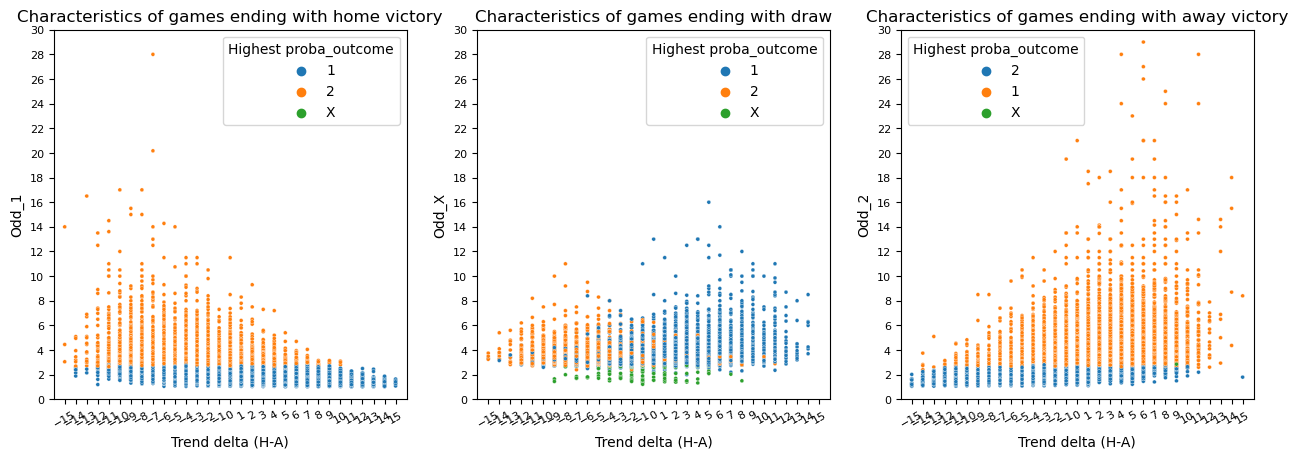

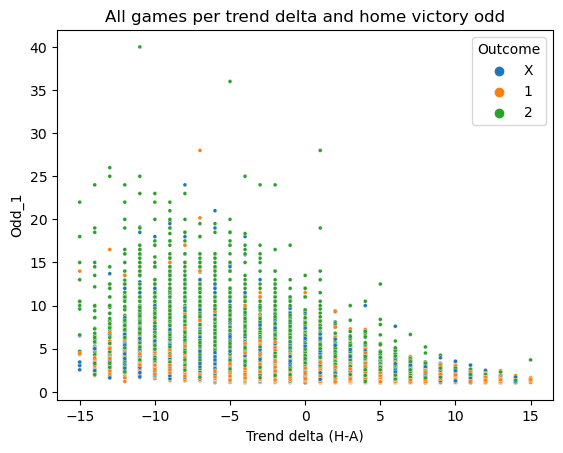

Home victories
count    41308.000000
mean         0.592210
std          4.483694
min        -15.000000
25%         -3.000000
50%          1.000000
75%          4.000000
max         15.000000
Name: Trend delta (H-A), dtype: float64
count    41308.000000
mean         2.110629
std          0.846706
min          1.030000
25%          1.620000
50%          1.970000
75%          2.400000
max         28.000000
Name: Odd_1, dtype: float64
Draws
count    25518.000000
mean        -0.441571
std          4.271447
min        -15.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max         14.000000
Name: Trend delta (H-A), dtype: float64
count    25518.000000
mean         3.410112
std          0.647248
min          1.220000
25%          3.100000
50%          3.250000
75%          3.500000
max         16.000000
Name: Odd_X, dtype: float64
Away victories
count    26800.000000
mean        -1.359851
std          4.443792
min        -15.000000
25%         -4.000000
50%         -1

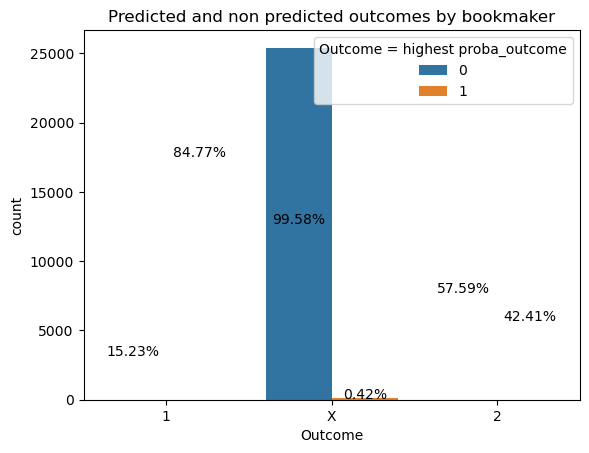

With highest proba between 0.34 and 0.5, the rate of correct predictions by the bookmaker is:
0.4
With highest proba between 0.5 and 0.6, the rate of correct predictions by the bookmaker is:
0.51
With highest proba between 0.6 and 0.7, the rate of correct predictions by the bookmaker is:
0.61
With highest proba between 0.7 and 0.8, the rate of correct predictions by the bookmaker is:
0.73
With highest proba between 0.8 and 0.9, the rate of correct predictions by the bookmaker is:
0.84
With highest proba between 0.9 and 1, the rate of correct predictions by the bookmaker is:
0.92


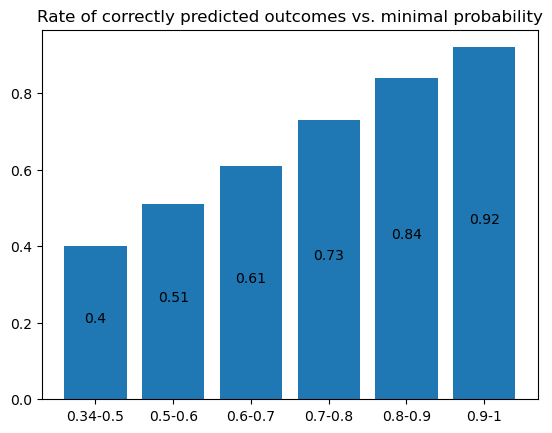

[0.4, 0.5, 0.61, 0.73, 0.84, 0.93]
[0.41, 0.52, 0.62, 0.74, 0.8, 0.9]


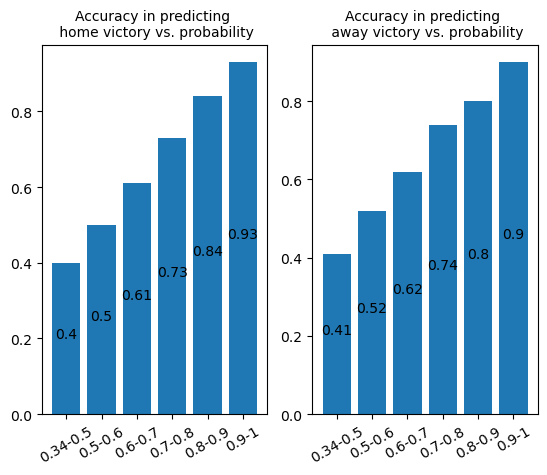

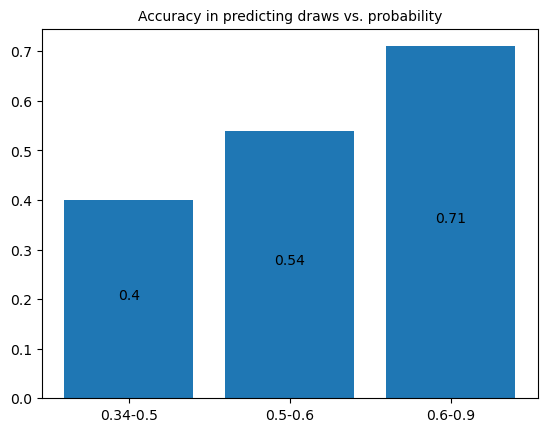

[93626, 93618, 93567, 93074, 91970, 89100, 86633, 82373, 78597, 74416, 68879, 63890, 59631, 58400, 54466, 50644, 47523, 43469, 40190, 38379, 34991, 32549, 30983, 27591, 25439, 23840, 22124, 20391, 18404, 17510, 15548, 14625, 13001, 12175, 11068, 9830, 8903, 8097, 7159, 6617, 6252, 5494, 4932, 4425, 3981, 3509, 3025, 2704, 2275, 1996, 1500, 1356, 1018, 918, 764, 502, 368, 294, 219, 161, 63, 29, 12, 5]
[0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47
 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97]
[-0.0546, -0.0546, -0.0546, -0.0545, -0.0539, -0.0533, -0.0515, -0.0498, -0.0483, -0.0476, -0.0479, -0.0446, -0.0436, -0.0445, -0.0447, -0.0434, -0.0433, -0.0413, -0.0399, -0.0386, -0.0345, -0.0317, -0.0309, -0.0291, -0.0274, -0.0274, -0.0257, -0.0248, -0.0226, -0.0224,

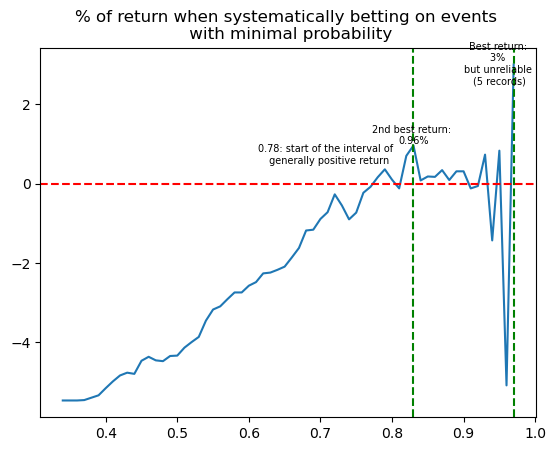

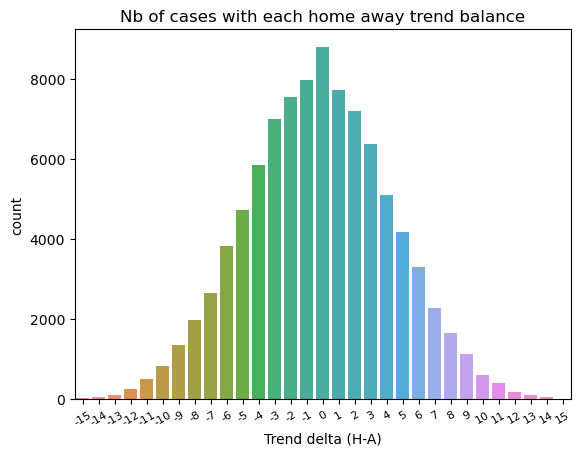

Number of games where delta is >0 : 40231
Number of games where delta is <0: 44602
0.256
0.20133333333333336
[-15.1, -14.1, -13.1, -12.1, -11.1, -10.1, -9.1, -8.1, -7.1, -6.1, -5.1, -4.1, -3.1, -2.1, -1.1, -0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.9, 14.9]
[-14.9, -13.9, -12.9, -11.9, -10.9, -9.9, -8.9, -7.9, -6.9, -5.9, -4.9, -3.9, -2.9, -1.9, -0.9, 0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1, 14.1, 15.1]
[-14.7, -13.7, -12.7, -11.7, -10.7, -9.7, -8.7, -7.7, -6.7, -5.7, -4.7, -3.7, -2.7, -1.7, -0.7, 0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3, 10.3, 11.3, 12.3, 13.3, 14.3, 15.3]


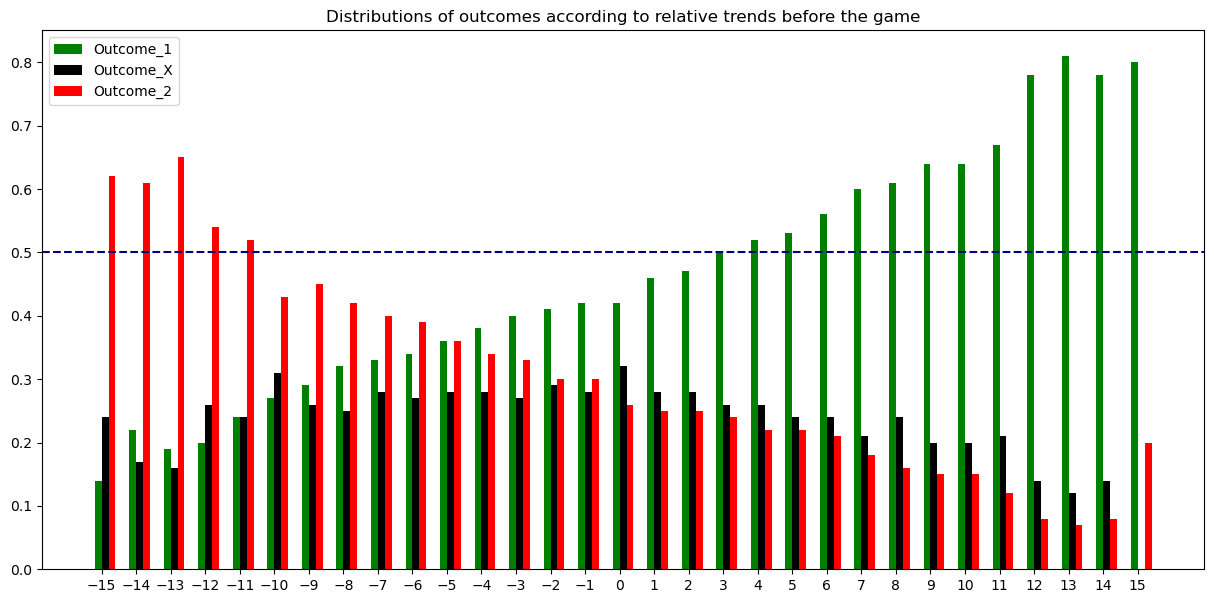

The S scenario applies for 17885 records with favoured home team 
and for 784 records with away team favoured, 
in total 18669 records
Cash movements if betting per scenario S
Gains for home victory bets: 17070.44
Gains for away victory bets: 732.69
Total gains : 17803.13
Cash balance: -865.87
Balance per game = -0.0464
Cash balance if betting only according to highest proba:
-0.0546
Returns if betting as per adapted S scenario with minimal probability of 0.5
(Number of games: 14321)
Gains: 13777.51
Cash balance: -543.49
Cash balance per game: -0.038
Returns if betting as per adapted S scenario with minimal probability of 0.6
(Number of games: 9123)
Gains: 8942.68
Cash balance: -180.32
Cash balance per game: -0.0198
Returns if betting as per adapted S scenario with minimal probability of 0.7
(Number of games: 4812)
Gains: 4794.26
Cash balance: -17.74
Cash balance per game: -0.0037
Returns if betting as per adapted S scenario with minimal probability of 0.8
(Number of games: 2082)
Gains

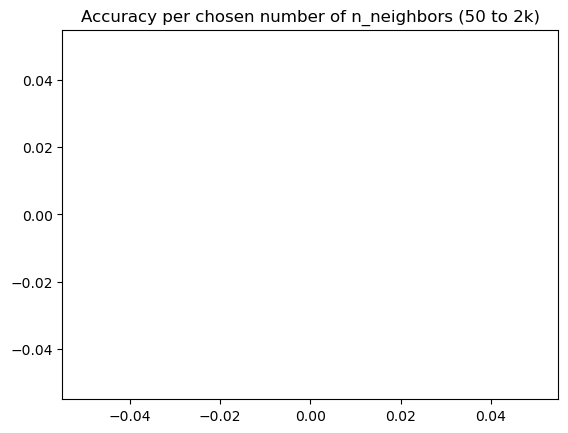

{}


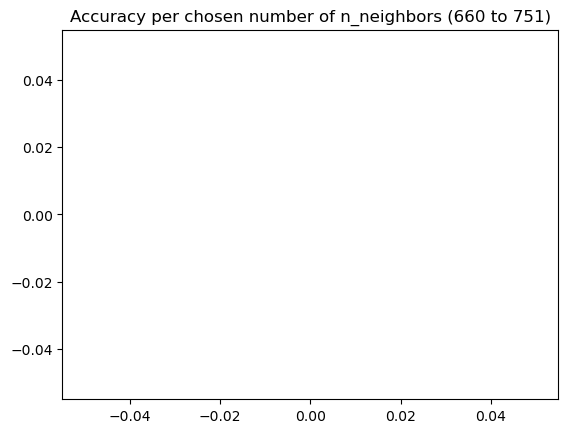

[[ 0.16988995  0.02241889 -0.48416325 -1.05802153]
 [ 0.06037627 -0.33317694 -0.5091956   0.27795358]
 [-0.40688205 -0.18077873 -0.20165532 -1.50334656]
 ...
 [ 1.26502665  0.02241889 -0.75236699 -0.39003397]
 [-0.69891851  0.98760757  0.90692013  0.94594113]
 [ 1.37454032  0.02241889 -0.77382329 -1.50334656]]
Confusion Matrix
[[6904 1165  147]
 [3073 2158  115]
 [3782 1234  148]]
Normalized Confusion Matrix
[[0.50178065 0.25565065 0.35853659]
 [0.22334472 0.47355716 0.2804878 ]
 [0.27487463 0.27079219 0.36097561]]
0        2.70
1        2.55
2        1.91
3        1.45
4        2.70
         ... 
18721    2.70
18722    1.48
18723    4.20
18724    1.51
18725    4.35
Name: Odd_1, Length: 18726, dtype: float64
['2' '1' '1' ... '2' '1' '2']
0        2
1        2
2        1
3        1
4        1
        ..
18721    1
18722    X
18723    2
18724    X
18725    2
Name: Outcome, Length: 18726, dtype: object
Balance when using the model's predictions for home victory only
Abs: -921.019999999929

0.5031712473572938
7.8875
count    13759.000000
mean         1.233243
std          0.968264
min          0.503171
25%          0.713253
50%          0.890957
75%          1.323529
max          7.887500
Name: prediction_strength, dtype: float64


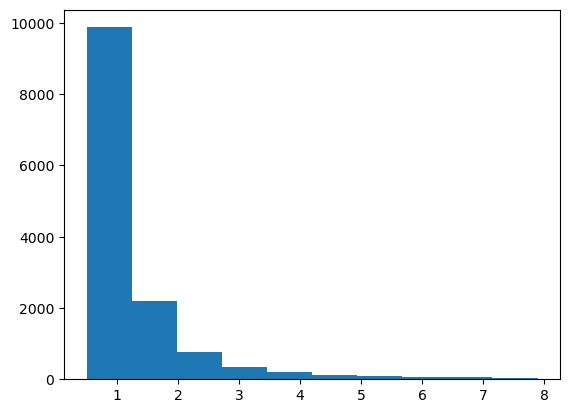

C:\Users\em17\AppData\Local\Temp\ipykernel_16800\2085083262.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_1['prediction_strength_binned'] = pd.cut(test_df_sub_1['prediction_strength'], strength_bins)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\322501866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_1[f'pred_strength_w={w}'] = test_df_sub_1.apply(strength_weighted_1,axis = 1)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\322501866.py:30: SettingWithCopyWarning: 
A

C:\Users\em17\AppData\Local\Temp\ipykernel_16800\322501866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_1[f'pred_strength_w={w}'] = test_df_sub_1.apply(strength_weighted_1,axis = 1)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\322501866.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_1[f'strength_binned_w={w}'] = pd.cut(test_df_sub_1[f'pred_strength_w={w}'], strength_bins)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\322501866.py:8: SettingWithCopyWarning: 
A valu

1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2
2.1
2.2
2.3
2.4
2.5
0.5095541401273885
0.7215496368038742
count    410.000000
mean       0.600588
std        0.042046
min        0.509554
25%        0.569536
50%        0.604966
75%        0.627002
max        0.721550
Name: prediction_strength, dtype: float64


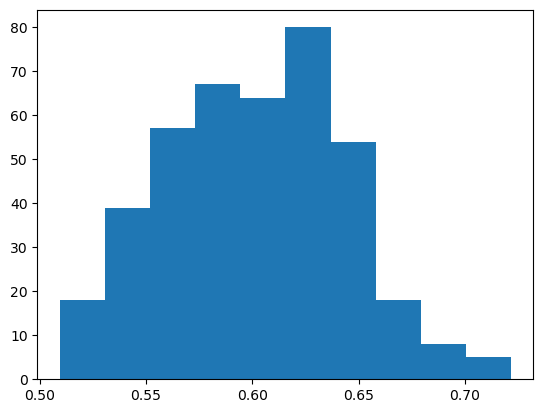

[0.5, 0.5456521739130435, 0.5626373626373626, 0.58, 0.5906040268456376, 0.6049661399548534, 0.6159090909090911, 0.6195899772209565, 0.6382488479262672, 0.6534883720930232, 7.8875]
[(0.62, 0.638], (0.653, 7.888], (0.638, 0.653], (0.591, 0.605], (0.605, 0.616], (0.546, 0.563], (0.58, 0.591], (0.5, 0.546], (0.563, 0.58], (0.616, 0.62]]
Categories (10, interval[float64, right]): [(0.5, 0.546] < (0.546, 0.563] < (0.563, 0.58] < (0.58, 0.591] ... (0.616, 0.62] < (0.62, 0.638] < (0.638, 0.653] < (0.653, 7.888]]
[(0.5, 0.546], (0.546, 0.563], (0.563, 0.58], (0.58, 0.591], (0.591, 0.605], (0.605, 0.616], (0.616, 0.62], (0.62, 0.638], (0.638, 0.653], (0.653, 7.888]]
Categories (10, interval[float64, right]): [(0.5, 0.546] < (0.546, 0.563] < (0.563, 0.58] < (0.58, 0.591] ... (0.616, 0.62] < (0.62, 0.638] < (0.638, 0.653] < (0.653, 7.888]]
51.9787
0.2625186868686869
0.5031712473572938
3.771812080536912
count    4557.000000
mean        1.024944
std         0.628731
min         0.503171
25%         

C:\Users\em17\AppData\Local\Temp\ipykernel_16800\190982910.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_X['prediction_strength_binned'] = pd.cut(test_df_sub_X['prediction_strength'], strength_bins)


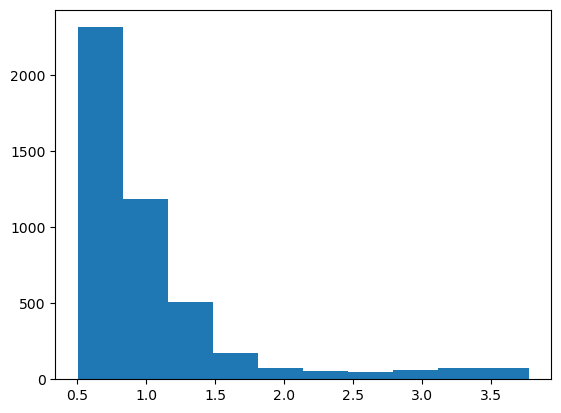

C:\Users\em17\AppData\Local\Temp\ipykernel_16800\40116584.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_2['prediction_strength_binned'] = pd.cut(test_df_sub_2['prediction_strength'], strength_bins)


Gain in units using positive returns segments
21.4554
Gain as %  of nb of bets using positive returns segments
1.5718241758241758


C:\Users\em17\AppData\Local\Temp\ipykernel_16800\3761865986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_2[f'pred_strength_w={w}'] = test_df_sub_2.apply(strength_weighted_2,axis = 1)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\3761865986.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_sub_2[f'strength_binned_w={w}'] = pd.cut(test_df_sub_2[f'pred_strength_w={w}'], strength_bins)
C:\Users\em17\AppData\Local\Temp\ipykernel_16800\3761865986.py:8: SettingWithCopyWarning: 
A v

1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2
Weight = 1.1
        W=1.1 bins  W=1.1 bin games  W=1.1 returns %  W=1.1 returns abs
1   (0.124, 0.182]              228             4.48            10.2144
3   (0.215, 0.234]              228             0.94             2.1432
10   (0.363, 0.38]              227             9.07            20.5889
18  (0.484, 0.502]              229             6.12            14.0148
19  (0.502, 0.551]              227             7.76            17.6152
ABSOLUTE BENEFIT
64.58
BENEFIT IN %
5.67
Weight = 1.2
        W=1.2 bins  W=1.2 bin games  W=1.2 returns %  W=1.2 returns abs
1    (0.115, 0.17]              228             4.48            10.2144
3    (0.202, 0.22]              228             0.94             2.1432
10  (0.342, 0.359]              227            10.78            24.4706
18   (0.46, 0.477]              228             5.90            13.4520
19  (0.477, 0.521]              227             6.59            14.9593
ABSOLUTE BENEFIT
65.24
BENEFIT 

In [3]:
%run Project_Paris.ipynb import KNN_pred_strength, KNN_segmented_predictors

In [10]:
all = '''<ss-dashboard-list-container class="sb-dashboard-list-container sb-dashboard-list-container--desktop"><div id="homeItemsWrapper" class="sb-dashboard-list-wrapper"><!----><ss-bms-container class="ss-bms-container ng-star-inserted"><!----></ss-bms-container><div class="sb-bms__main sb-bms__main--dashboard sb-bms__main--desktop ng-star-inserted"><ss-bms-container class="ss-bms-container"><ss-bms-carousel class="ng-tns-c294-4 ng-star-inserted"><div class="sb-bms__wrapper ng-tns-c294-4 ng-star-inserted"><div class="sb-bms ng-tns-c294-4"><div class="sb-bms__container sb-bms__container--carousel ng-tns-c294-4"><div class="sb-bms__carousel__content ng-tns-c294-4 ng-trigger ng-trigger-transform" style="transform: translateX(0%);"><!----><ss-fixed-carousel-item class="ng-tns-c294-4 ss-fixed-carousel-item ss-fixed-carousel-item--desktop ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--image sb-bms__card--carousel"><div class="sb-bms-item sb-bms-item--carousel"><ss-bms-link class="bms-link ng-star-inserted"><a uittir="banner / image / "><ui-image class="ui-image"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="500 x 300 Virgule d'Or gains X3.png" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="500 x 300 Virgule d'Or gains X3.png" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2F500%20x%20300%20Virgule%20d'Or%20gains%20X3.png&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image></a></ss-bms-link><!----><!----><!----></div></div></ss-fixed-carousel-item><!----><!----><ss-dynamic-item class="ng-tns-c294-4 ss-dynamic-item ss-dynamic-item--desktop ss-dynamic-item--carousel ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--dynamic sb-bms__card--carousel ng-star-inserted"><div class="sb-bms-item"><div class="sb-bms-item__content sb-bms-item__content--carousel ng-star-inserted" style=""><ui-image class="sb-bms-item__background ui-image ng-star-inserted"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="ligue1-lyon-lacazette-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="ligue1-lyon-lacazette-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-lyon-lacazette-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image><!----><div class="sb-bms-item__info sb-bms-item__info--carousel ng-star-inserted"><div class="sb-bms-item__information"><div class="sb-bms-item__competitor sb-bms-item__competitor--home ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1649.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1649.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Lyon</span></div></div><!----><div class="sb-bms-item__status"><div class="sb-bms-item__status__time ng-star-inserted"><!----> 3 mars <!----><!----></div><!----><div class="sb-bms-item__status__date ng-star-inserted"> 20h45 </div><!----><!----><div class="sb-bms-item__status__league"><ui-icon class="ng-star-inserted"><div class="sb-icon sb-icon--img sb-icon--big ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="fra" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><!----><!----><!----><!----><!----></div><!----></div><div class="sb-bms-item__competitor sb-bms-item__competitor--away ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1648.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1648.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Lens</span></div></div><!----></div><div class="sb-bms-item__odds ng-star-inserted"><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">1</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">2,75 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">Nul</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">3,30 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">2</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">2,85 </span><!----><!----></div><!----><!----><!----></div><!----></div><!----></div><!----></div></div><!----><!----><!----></ss-dynamic-item><!----><!----><!----><ss-dynamic-item class="ng-tns-c294-4 ss-dynamic-item ss-dynamic-item--desktop ss-dynamic-item--carousel ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--dynamic sb-bms__card--carousel ng-star-inserted"><div class="sb-bms-item"><div class="sb-bms-item__content sb-bms-item__content--carousel ng-star-inserted" style=""><ui-image class="sb-bms-item__background ui-image ng-star-inserted"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="ligue1-nice-groupe-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="ligue1-nice-groupe-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-nice-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image><!----><div class="sb-bms-item__info sb-bms-item__info--carousel ng-star-inserted"><div class="sb-bms-item__information"><div class="sb-bms-item__competitor sb-bms-item__competitor--home ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1681.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1681.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Toulouse</span></div></div><!----><div class="sb-bms-item__status"><div class="sb-bms-item__status__time ng-star-inserted"><!----> 3 mars <!----><!----></div><!----><div class="sb-bms-item__status__date ng-star-inserted"> 13h00 </div><!----><!----><div class="sb-bms-item__status__league"><ui-icon class="ng-star-inserted"><div class="sb-icon sb-icon--img sb-icon--big ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="fra" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><!----><!----><!----><!----><!----></div><!----></div><div class="sb-bms-item__competitor sb-bms-item__competitor--away ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1661.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1661.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Nice</span></div></div><!----></div><div class="sb-bms-item__odds ng-star-inserted"><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">1</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">3,35 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">Nul</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">3,05 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">2</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">2,25 </span><!----><!----></div><!----><!----><!----></div><!----></div><!----></div><!----></div></div><!----><!----><!----></ss-dynamic-item><!----><!----><!----><ss-dynamic-item class="ng-tns-c294-4 ss-dynamic-item ss-dynamic-item--desktop ss-dynamic-item--carousel ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--dynamic sb-bms__card--carousel ng-star-inserted"><div class="sb-bms-item"><div class="sb-bms-item__content sb-bms-item__content--carousel ng-star-inserted" style=""><ui-image class="sb-bms-item__background ui-image ng-star-inserted"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="pl-manchester-city-haaland-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="pl-manchester-city-haaland-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fpl-manchester-city-haaland-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image><!----><div class="sb-bms-item__info sb-bms-item__info--carousel ng-star-inserted"><div class="sb-bms-item__information"><div class="sb-bms-item__competitor sb-bms-item__competitor--home ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F17.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F17.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Manchester City</span></div></div><!----><div class="sb-bms-item__status"><div class="sb-bms-item__status__time ng-star-inserted"><!----> 3 mars <!----><!----></div><!----><div class="sb-bms-item__status__date ng-star-inserted"> 16h30 </div><!----><!----><div class="sb-bms-item__status__league"><ui-icon class="ng-star-inserted"><div class="sb-icon sb-icon--img sb-icon--big ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Feng.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="eng" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Feng.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><!----><!----><!----><!----><!----></div><!----></div><div class="sb-bms-item__competitor sb-bms-item__competitor--away ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F35.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F35.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Manchester United</span></div></div><!----></div><div class="sb-bms-item__odds ng-star-inserted"><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">1</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">1,24 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">Nul</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">6,25 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">2</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">9,50 </span><!----><!----></div><!----><!----><!----></div><!----></div><!----></div><!----></div></div><!----><!----><!----></ss-dynamic-item><!----><!----><!----><ss-dynamic-item class="ng-tns-c294-4 ss-dynamic-item ss-dynamic-item--desktop ss-dynamic-item--carousel ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--dynamic sb-bms__card--carousel ng-star-inserted"><div class="sb-bms-item"><div class="sb-bms-item__content sb-bms-item__content--carousel ng-star-inserted" style=""><ui-image class="sb-bms-item__background ui-image ng-star-inserted"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="liga-atletico-griezmann-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="liga-atletico-griezmann-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fliga-atletico-griezmann-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image><!----><div class="sb-bms-item__info sb-bms-item__info--carousel ng-star-inserted"><div class="sb-bms-item__information"><div class="sb-bms-item__competitor sb-bms-item__competitor--home ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F2836.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F2836.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Atlético Madrid</span></div></div><!----><div class="sb-bms-item__status"><div class="sb-bms-item__status__time ng-star-inserted"><!----> 3 mars <!----><!----></div><!----><div class="sb-bms-item__status__date ng-star-inserted"> 16h15 </div><!----><!----><div class="sb-bms-item__status__league"><ui-icon class="ng-star-inserted"><div class="sb-icon sb-icon--img sb-icon--big ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fesp.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="esp" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fesp.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><!----><!----><!----><!----><!----></div><!----></div><div class="sb-bms-item__competitor sb-bms-item__competitor--away ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F2816.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F2816.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Betis</span></div></div><!----></div><div class="sb-bms-item__odds ng-star-inserted"><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">1</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">1,52 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">Nul</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">4,10 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">2</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">5,70 </span><!----><!----></div><!----><!----><!----></div><!----></div><!----></div><!----></div></div><!----><!----><!----></ss-dynamic-item><!----><!----><!----><ss-dynamic-item class="ng-tns-c294-4 ss-dynamic-item ss-dynamic-item--desktop ss-dynamic-item--carousel ng-star-inserted" style=""><div class="sb-bms__card sb-bms__card--dynamic sb-bms__card--carousel sb-bms__card--last ng-star-inserted"><div class="sb-bms-item"><div class="sb-bms-item__content sb-bms-item__content--carousel ng-star-inserted" style=""><ui-image class="sb-bms-item__background ui-image ng-star-inserted"><div uidefer="" class="image ng-star-inserted"><div class="image__wrapper has-animation ng-star-inserted" style="padding-bottom: 60%;"><div class="ng-star-inserted image__loader is-not-visible"></div><!----><picture class="image__preload ng-star-inserted is-not-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=2&amp;blur=15 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;t=webp&amp;dpr=3&amp;blur=15 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=2&amp;blur=15 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=3&amp;blur=15 3x"><img alt="ligue1-rennes-groupe-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=0.5&amp;dpr=1&amp;blur=15"></picture><!----><picture class="image__original ng-star-inserted is-visible"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=2 2x ,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;t=webp&amp;dpr=3 3x"><source type="image/jpeg" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1, https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=2 2x,https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=3 3x"><img alt="ligue1-rennes-groupe-2024.jpg" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fsportsbook%2Fbms%2Fimages%2Fligue1-rennes-groupe-2024.jpg&amp;w=500&amp;h=300&amp;q=1&amp;dpr=1"></picture><!----></div><!----><!----></div><!----><!----><!----></ui-image><!----><div class="sb-bms-item__info sb-bms-item__info--carousel ng-star-inserted"><div class="sb-bms-item__information"><div class="sb-bms-item__competitor sb-bms-item__competitor--home ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1658.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1658.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Rennes</span></div></div><!----><div class="sb-bms-item__status"><div class="sb-bms-item__status__time ng-star-inserted"><!----> 3 mars <!----><!----></div><!----><div class="sb-bms-item__status__date ng-star-inserted"> 17h05 </div><!----><!----><div class="sb-bms-item__status__league"><ui-icon class="ng-star-inserted"><div class="sb-icon sb-icon--img sb-icon--big ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="fra" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><!----><!----><!----><!----><!----></div><!----></div><div class="sb-bms-item__competitor sb-bms-item__competitor--away ng-star-inserted"><div class="sb-bms-item__competitor__logo hidden"><ui-icon><div class="sb-icon sb-icon--img sb-icon--placeholder sb-icon--big sb-icon--full-size ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: none;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1656.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="[object Object]" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fimg.sportradar.com%2Fls%2Fcrest%2Fbig%2F1656.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon></div><div class="sb-bms-item__competitor__name"><span>Lorient</span></div></div><!----></div><div class="sb-bms-item__odds ng-star-inserted"><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">1</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">1,42 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">Nul</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">4,50 </span><!----><!----></div><!----><!----><!----><div class="sb-bms-item__button sb-bms-item__button--carousel ng-star-inserted"><span class="sb-bms-item__button-name ng-star-inserted">2</span><!----><!----><span class="sb-bms-item__button-value ng-star-inserted">7,25 </span><!----><!----></div><!----><!----><!----></div><!----></div><!----></div><!----></div></div><!----><!----><!----></ss-dynamic-item><!----><!----><!----><!----></div></div><!----><!----></div></div><!----></ss-bms-carousel><!----><!----><!----><!----><!----></ss-bms-container></div><div class="sb-bms__main sb-bms__main--dashboard sb-bms__main--desktop ng-star-inserted"><ss-bms-container class="ss-bms-container"><!----><ss-bms-slider class="ng-tns-c296-5 ng-star-inserted"><!----></ss-bms-slider><!----><!----><!----><!----></ss-bms-container></div><!----><!----><!----><!----><!----><!----></div><ss-events-list class="sb-event-list sb-event-list--dashboard sb-event-list--normal ng-tns-c385-8 sb-event-list--desktop ng-star-inserted"><div pt="" class="sb-event-list__main ng-tns-c385-8 sb-event-list__main--desktop sb-event-list__main--normal sb-event-list__main--padding" pt-scope="matchlist"><!----><!----><!----><!----><ss-event-list-sub-header class="sb-event-list__sub-header-wrapper ng-tns-c308-9 ng-tns-c385-8 sb-event-list__sub-header-wrapper--desktop sb-event-list__sub-header-wrapper--dashboard sb-event-list-sub-header sb-event-list-sub-header--desktop sb-event-list-sub-header--dashboard ng-star-inserted"><div class="sb-event-list__sub-header-container ng-tns-c308-9 sb-event-list__sub-header-container--desktop sb-event-list__sub-header-container--dashboard"><!----><!----><!----><div class="sb-event-list__sub-header ng-tns-c308-9 ng-trigger ng-trigger-animateScroll sb-event-list__sub-header--desktop sb-event-list__sub-header--dashboard" style="height: 60px;"><!----><!----><ui-button uibadgebutton="" uiextendedbutton="" pt="" class="ng-tns-c308-9 sb-button--x-large soccer sb-button sb-button--badge sb-button--extended sb-button--active ng-star-inserted" data-sport="Football" pt-item="sport" pt-id="1" style=""><div class="sb-button__content"><ui-icon><div class="sb-icon sb-icon--img sb-icon--size-32 ng-star-inserted sb-icon--with-sub-path"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"> Football </span><span class="sb-button__subtext"><!----></span></div><span uifont="" class="sb-button__badge font-fr font-semiBold ng-star-inserted"> 19 </span><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----><!----><!----><!----><!----><ui-button uibadgebutton="" uiextendedbutton="" pt="" class="ng-tns-c308-9 sb-button--x-large tennis sb-button sb-button--badge sb-button--extended ng-star-inserted" data-sport="Tennis" pt-item="sport" pt-id="2" style=""><div class="sb-button__content"><ui-icon><div class="sb-icon sb-icon--img sb-icon--size-32 ng-star-inserted sb-icon--with-sub-path"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Ftennis.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="tennis" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Ftennis.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"> Tennis </span><span class="sb-button__subtext"><!----></span></div><span uifont="" class="sb-button__badge font-fr font-semiBold ng-star-inserted"> 2 </span><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----><!----><!----><!----><!----><ui-button uibadgebutton="" uiextendedbutton="" pt="" class="ng-tns-c308-9 sb-button--x-large rugby sb-button sb-button--badge sb-button--extended ng-star-inserted" data-sport="Rugby" pt-item="sport" pt-id="12" style=""><div class="sb-button__content"><ui-icon><div class="sb-icon sb-icon--img sb-icon--size-32 ng-star-inserted sb-icon--with-sub-path"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Frugby.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="rugby" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Frugby.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"> Rugby </span><span class="sb-button__subtext"><!----></span></div><span uifont="" class="sb-button__badge font-fr font-semiBold ng-star-inserted"> 1 </span><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----><!----><!----><!----><!----><ui-button uibadgebutton="" uiextendedbutton="" pt="" class="ng-tns-c308-9 sb-button--x-large basketball sb-button sb-button--badge sb-button--extended ng-star-inserted" data-sport="Basketball" pt-item="sport" pt-id="3" style=""><div class="sb-button__content"><ui-icon><div class="sb-icon sb-icon--img sb-icon--size-32 ng-star-inserted sb-icon--with-sub-path"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fbasketball.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="basketball" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fbasketball.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup"><!----></div></div><!----><!----><!----></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"> Basketball </span><span class="sb-button__subtext"><!----></span></div><span uifont="" class="sb-button__badge font-fr font-semiBold ng-star-inserted"> 3 </span><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----><!----><!----><!----><!----><!----><!----></div><!----><!----></div></ss-event-list-sub-header><!----><!----><!----><!----><!----><div class="sb-event-list__sport-wrapper ng-tns-c385-8 ng-trigger ng-trigger-fadeIn sb-event-list__sport-wrapper--desktop sb-event-list__sport-wrapper--first sb-event-list__sport-wrapper--first-multi ng-star-inserted" id="Football"><ss-events-list-sport class="ng-tns-c385-8 ng-tns-c379-10 ng-star-inserted" style=""><div class="sb-event-list__sport-content ng-tns-c379-10 sb-event-list__sport-content--desktop"><!----><!----><!----><!----><!----><ss-events-list-league class="sb-event-list__league-wrapper ng-tns-c369-11 ng-tns-c379-10 ng-star-inserted" id="123" data-id="123" data-status="loaded"><ss-events-list-league-header class="ng-tns-c310-12 ng-tns-c369-11 ng-star-inserted"><div class="sb-event-list__league-header ng-tns-c310-12 sb-event-list__league-header--first sb-event-list__league-header--first-sport sb-event-list__league-header--soccer"><div class="sb-event-list__league-info ng-tns-c310-12"><div class="sb-event-list__league-info__icon ng-tns-c310-12"><ui-icon class="ng-tns-c310-12"><div class="sb-icon sb-icon--img sb-icon--with-sub-path sb-icon--size-36 ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup sb-icon--sup-size-24"><div class="ng-star-inserted" style=""><ui-image class="ui-image" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="fra" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Ffra.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----></div><!----></div></div><!----><!----><!----></ui-icon></div><span class="sb-event-list__league-info__text ng-tns-c310-12"> Ligue 1 Uber Eats© </span><span class="sb-event-list__league-info__count ng-tns-c310-12"> 16 </span><ss-short-list-star class="ng-tns-c310-12 ng-star-inserted"><div class="sb-short-list-star ng-star-inserted"><div class="ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-20"><path fill-rule="evenodd" clip-rule="evenodd" d="m12 4 2.472 4.957L20 9.752l-4 3.858.944 5.449L12 16.486 7.056 19.06 8 13.61 4 9.752l5.528-.795L12 4Zm0 3.917-1.309 2.625-2.926.42 2.117 2.043-.5 2.885L12 14.528l2.618 1.362-.5-2.885 2.117-2.043-2.926-.42L12 7.917Z"></path></svg></ui-icon></div><!----><!----></div><!----><!----><!----></ss-short-list-star><!----><!----></div><div class="sb-event-list__league-header__actions ng-tns-c310-12"><ss-smart-promo class="ng-tns-c310-12"><ui-promo-banner class="ng-tns-c90-60 ng-star-inserted" style=""><!----><div class="promo-banner ng-tns-c90-60 promo-banner--event-list ng-star-inserted"><!----><div class="promo-banner__items ng-tns-c90-60 ng-star-inserted"><div class="promo-banner__item ng-tns-c90-60 promo-banner__item--space ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-60 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-60"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/179605a0-8b09-4119-93e3-fdb1e833addc.png" alt="CombiMax" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-60"><span class="promo-banner__name ng-tns-c90-60 promo-banner__name--space">CombiMax</span><!----></div></div><!----><div class="promo-banner__item ng-tns-c90-60 ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-60 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-60"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/ad98fd30-91f1-4148-bf80-7b71f5a61a78.png" alt="VIRGULE D'OR" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-60"><span class="promo-banner__name ng-tns-c90-60">VIRGULE D'OR</span><!----></div></div><!----><!----></div><!----><!----></div><!----><!----></ui-promo-banner><!----><!----><!----><!----><!----><!----></ss-smart-promo><span class="sb-event-list__league-header__toggle ng-tns-c310-12 ng-trigger ng-trigger-rotate ng-star-inserted" style="transform: rotate(0deg);"><ui-icon class="ng-tns-c310-12"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-28"><path fill-rule="evenodd" d="M6 13.657L11.657 8l5.657 5.657-1.415 1.414-4.242-4.243-4.243 4.243z"></path></svg></ui-icon></span><!----><!----></div></div></ss-events-list-league-header><!----><!----><!----><!----><!----><!----><!----><div class="ng-trigger ng-trigger-eventCollapseAnimation ng-tns-c369-11 ng-star-inserted"><!----><div class="sb-event-list__container ng-tns-c369-11 sb-event-list__container--desktop ng-star-inserted" style=""><div type="event-list" class="ng-tns-c369-11 ng-star-inserted" style=""><ss-event-list-outcome-header class="ng-tns-c313-61 ng-tns-c369-11 sb-event-list-outcome-header sb-event-list-outcome-header--desktop ng-star-inserted"><div class="sb-event-list__outcome-header ng-tns-c313-61 sb-event-list__outcome-header--desktop"><div class="sb-event-list__outcome-header__date ng-tns-c313-61 sb-event-list__outcome-header__date--team"><!----><span class="sb-event-list__outcome-header__date-item ng-tns-c313-61 sb-event-list__outcome-header__date-item--desktop ng-star-inserted"> 3 mars </span><span class="sb-event-list__outcome-header__date-week ng-tns-c313-61 sb-event-list__outcome-header__date-week--desktop ng-star-inserted"> Dimanche </span><!----><!----><!----><!----><!----><!----><!----></div><div class="sb-event-list__outcome-header__content ng-tns-c313-61 sb-event-list__outcome-header__content--team"><!----><div class="sb-event-list__holder-selections ng-tns-c313-61 sb-event-list__holder-selections--3x ng-star-inserted"><span class="ng-tns-c313-61">1N2</span></div><!----><!----><!----><!----></div><div class="sb-event-list__holder-more ng-tns-c313-61 ng-star-inserted"></div><!----></div></ss-event-list-outcome-header><!----><!----><!----><!----><!----><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-11"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57178"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57178"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 13h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="932"> Toulouse <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1027"> Nice </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Toulouse </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,35 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,05 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nice </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>837</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57158"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57158"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1009"> Montpellier <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="927"> Strasbourg </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Montpellier </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,05 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,40 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Strasbourg </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,60 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>855</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57159"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57159"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="958"> Nantes <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="768"> Metz </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nantes </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,80 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,30 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Metz </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 5,00 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>843</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57165"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57165"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="989"> Brest <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="793"> Le Havre </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Brest </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,58 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,60 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Le Havre </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 6,50 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>831</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57181"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57181"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 17h05 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="990"> Rennes <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="926"> Lorient </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Rennes </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,42 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 4,50 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Lorient </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 7,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>837</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57161"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57161"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 20h45 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1026"> Lyon <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="937"> Lens </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Lyon </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,75 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,30 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Lens </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,85 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>837</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><div type="event-list" class="ng-tns-c369-11 ng-star-inserted" style=""><!----><!----><!----><ss-event-list-outright-header class="ng-tns-c369-11 ng-star-inserted"><div class="sb-event-list__outright-header sb-event-list__outright-header--desktop sb-event-list__outright-header--v2"> Vainqueurs
</div></ss-event-list-outright-header><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-11"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="32337"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="32337"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info--outright sb-event-list-event-info ng-star-inserted" style=""><!----><!----><ss-event-info-outright class="ng-star-inserted"><div class="sb-event-list__outright"><div class="sb-event-list__event__row"><span class="date ng-star-inserted"> 3 mars </span><!----><!----></div><div>Pari compétition - Ligue 1 2023/24</div><!----></div></ss-event-info-outright><!----><!----></ss-event-list-event-info><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><!----><ss-more-buttons-outright class="sb-more-buttons-outright ng-star-inserted"><ui-button pt="" class="sb-event-list__more sb-event-list__more--outright sb-button--x-large sb-button" pt-item="oddcount"><div class="sb-button__content"><div class="sb-button__text"><span class="sb-button__maintext"><!----><ui-icon class="ng-star-inserted"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M12.414 17.314L11 15.899l4.243-4.242L11 7.414 12.414 6l5.657 5.657-5.657 5.657zm-5 0L6 15.899l4.243-4.242L6 7.414 7.414 6l5.657 5.657-5.657 5.657z"></path></svg></ui-icon><!----><!----></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button></ss-more-buttons-outright><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><!----></div><!----><!----><!----></div><!----><!----></ss-events-list-league><!----><!----><ss-events-list-league class="sb-event-list__league-wrapper ng-tns-c369-15 ng-tns-c379-10 ng-star-inserted" id="261" data-id="261" data-status="loaded"><ss-events-list-league-header class="ng-tns-c310-16 ng-tns-c369-15 ng-star-inserted"><div class="sb-event-list__league-header ng-tns-c310-16 sb-event-list__league-header--soccer"><div class="sb-event-list__league-info ng-tns-c310-16"><div class="sb-event-list__league-info__icon ng-tns-c310-16"><ui-icon class="ng-tns-c310-16"><div class="sb-icon sb-icon--img sb-icon--with-sub-path sb-icon--size-36 ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup sb-icon--sup-size-24"><div class="ng-star-inserted" style=""><ui-image class="ui-image" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Feng.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="eng" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Feng.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----></div><!----></div></div><!----><!----><!----></ui-icon></div><span class="sb-event-list__league-info__text ng-tns-c310-16"> Premier League </span><span class="sb-event-list__league-info__count ng-tns-c310-16"> 25 </span><ss-short-list-star class="ng-tns-c310-16 ng-star-inserted"><div class="sb-short-list-star ng-star-inserted"><div class="ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-20"><path fill-rule="evenodd" clip-rule="evenodd" d="m12 4 2.472 4.957L20 9.752l-4 3.858.944 5.449L12 16.486 7.056 19.06 8 13.61 4 9.752l5.528-.795L12 4Zm0 3.917-1.309 2.625-2.926.42 2.117 2.043-.5 2.885L12 14.528l2.618 1.362-.5-2.885 2.117-2.043-2.926-.42L12 7.917Z"></path></svg></ui-icon></div><!----><!----></div><!----><!----><!----></ss-short-list-star><!----><!----></div><div class="sb-event-list__league-header__actions ng-tns-c310-16"><ss-smart-promo class="ng-tns-c310-16"><ui-promo-banner class="ng-tns-c90-65 ng-star-inserted" style=""><!----><div class="promo-banner ng-tns-c90-65 promo-banner--event-list ng-star-inserted"><!----><div class="promo-banner__items ng-tns-c90-65 ng-star-inserted"><div class="promo-banner__item ng-tns-c90-65 ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-65 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-65"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/179605a0-8b09-4119-93e3-fdb1e833addc.png" alt="CombiMax" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-65"><span class="promo-banner__name ng-tns-c90-65">CombiMax</span><!----></div></div><!----><!----></div><!----><!----></div><!----><!----></ui-promo-banner><!----><!----><!----><!----><!----><!----></ss-smart-promo><span class="sb-event-list__league-header__toggle ng-tns-c310-16 ng-trigger ng-trigger-rotate ng-star-inserted" style="transform: rotate(0deg);"><ui-icon class="ng-tns-c310-16"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-28"><path fill-rule="evenodd" d="M6 13.657L11.657 8l5.657 5.657-1.415 1.414-4.242-4.243-4.243 4.243z"></path></svg></ui-icon></span><!----><!----></div></div></ss-events-list-league-header><!----><!----><!----><!----><!----><!----><!----><div class="ng-trigger ng-trigger-eventCollapseAnimation ng-tns-c369-15 ng-star-inserted"><!----><div class="sb-event-list__container ng-tns-c369-15 sb-event-list__container--desktop ng-star-inserted" style=""><div type="event-list" class="ng-tns-c369-15 ng-star-inserted" style=""><ss-event-list-outcome-header class="ng-tns-c313-66 ng-tns-c369-15 sb-event-list-outcome-header sb-event-list-outcome-header--desktop ng-star-inserted"><div class="sb-event-list__outcome-header ng-tns-c313-66 sb-event-list__outcome-header--desktop"><div class="sb-event-list__outcome-header__date ng-tns-c313-66 sb-event-list__outcome-header__date--team"><!----><span class="sb-event-list__outcome-header__date-item ng-tns-c313-66 sb-event-list__outcome-header__date-item--desktop ng-star-inserted"> 3 mars </span><span class="sb-event-list__outcome-header__date-week ng-tns-c313-66 sb-event-list__outcome-header__date-week--desktop ng-star-inserted"> Dimanche </span><!----><!----><!----><!----><!----><!----><!----></div><div class="sb-event-list__outcome-header__content ng-tns-c313-66 sb-event-list__outcome-header__content--team"><!----><div class="sb-event-list__holder-selections ng-tns-c313-66 sb-event-list__holder-selections--3x ng-star-inserted"><span class="ng-tns-c313-66">1N2</span></div><!----><!----><!----><!----></div><div class="sb-event-list__holder-more ng-tns-c313-66 ng-star-inserted"></div><!----></div></ss-event-list-outcome-header><!----><!----><!----><!----><!----><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-15"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="56751"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="56751"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 14h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2575"> Burnley <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2578"> Bournemouth </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Burnley </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,40 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,60 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Bournemouth </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,00 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>824</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="56748"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="56748"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 16h30 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="898"> Manchester City <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="899"> Manchester United </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Manchester City </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,24 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 6,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Manchester United </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 9,50 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>814</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><div type="event-list" class="ng-tns-c369-15 ng-star-inserted" style=""><!----><!----><!----><ss-event-list-outright-header class="ng-tns-c369-15 ng-star-inserted"><div class="sb-event-list__outright-header sb-event-list__outright-header--desktop sb-event-list__outright-header--v2"> Vainqueurs
</div></ss-event-list-outright-header><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-15"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="5500"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="5500"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info--outright sb-event-list-event-info ng-star-inserted" style=""><!----><!----><ss-event-info-outright class="ng-star-inserted"><div class="sb-event-list__outright"><div class="sb-event-list__event__row"><span class="date ng-star-inserted"> 30 mai </span><!----><!----></div><div>Pari compétition - Premier League 2023/24</div><!----></div></ss-event-info-outright><!----><!----></ss-event-list-event-info><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><!----><ss-more-buttons-outright class="sb-more-buttons-outright ng-star-inserted"><ui-button pt="" class="sb-event-list__more sb-event-list__more--outright sb-button--x-large sb-button" pt-item="oddcount"><div class="sb-button__content"><div class="sb-button__text"><span class="sb-button__maintext"><!----><ui-icon class="ng-star-inserted"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M12.414 17.314L11 15.899l4.243-4.242L11 7.414 12.414 6l5.657 5.657-5.657 5.657zm-5 0L6 15.899l4.243-4.242L6 7.414 7.414 6l5.657 5.657-5.657 5.657z"></path></svg></ui-icon><!----><!----></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button></ss-more-buttons-outright><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><!----></div><!----><!----><!----></div><!----><!----></ss-events-list-league><!----><!----><ss-events-list-league class="sb-event-list__league-wrapper ng-tns-c369-17 ng-tns-c379-10 ng-star-inserted" id="486" data-id="486" data-status="loaded"><ss-events-list-league-header class="ng-tns-c310-18 ng-tns-c369-17 ng-star-inserted"><div class="sb-event-list__league-header ng-tns-c310-18 sb-event-list__league-header--soccer"><div class="sb-event-list__league-info ng-tns-c310-18"><div class="sb-event-list__league-info__icon ng-tns-c310-18"><ui-icon class="ng-tns-c310-18"><div class="sb-icon sb-icon--img sb-icon--with-sub-path sb-icon--size-36 ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup sb-icon--sup-size-24"><div class="ng-star-inserted" style=""><ui-image class="ui-image" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fesp.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="esp" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fesp.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----></div><!----></div></div><!----><!----><!----></ui-icon></div><span class="sb-event-list__league-info__text ng-tns-c310-18"> LaLiga </span><span class="sb-event-list__league-info__count ng-tns-c310-18"> 16 </span><ss-short-list-star class="ng-tns-c310-18 ng-star-inserted"><div class="sb-short-list-star ng-star-inserted"><div class="ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-20"><path fill-rule="evenodd" clip-rule="evenodd" d="m12 4 2.472 4.957L20 9.752l-4 3.858.944 5.449L12 16.486 7.056 19.06 8 13.61 4 9.752l5.528-.795L12 4Zm0 3.917-1.309 2.625-2.926.42 2.117 2.043-.5 2.885L12 14.528l2.618 1.362-.5-2.885 2.117-2.043-2.926-.42L12 7.917Z"></path></svg></ui-icon></div><!----><!----></div><!----><!----><!----></ss-short-list-star><!----><!----></div><div class="sb-event-list__league-header__actions ng-tns-c310-18"><ss-smart-promo class="ng-tns-c310-18"><ui-promo-banner class="ng-tns-c90-67 ng-star-inserted" style=""><!----><div class="promo-banner ng-tns-c90-67 promo-banner--event-list ng-star-inserted"><!----><div class="promo-banner__items ng-tns-c90-67 ng-star-inserted"><div class="promo-banner__item ng-tns-c90-67 ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-67 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-67"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/179605a0-8b09-4119-93e3-fdb1e833addc.png" alt="CombiMax" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-67"><span class="promo-banner__name ng-tns-c90-67">CombiMax</span><!----></div></div><!----><!----></div><!----><!----></div><!----><!----></ui-promo-banner><!----><!----><!----><!----><!----><!----></ss-smart-promo><span class="sb-event-list__league-header__toggle ng-tns-c310-18 ng-trigger ng-trigger-rotate ng-star-inserted" style="transform: rotate(0deg);"><ui-icon class="ng-tns-c310-18"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-28"><path fill-rule="evenodd" d="M6 13.657L11.657 8l5.657 5.657-1.415 1.414-4.242-4.243-4.243 4.243z"></path></svg></ui-icon></span><!----><!----></div></div></ss-events-list-league-header><!----><!----><!----><!----><!----><!----><!----><div class="ng-trigger ng-trigger-eventCollapseAnimation ng-tns-c369-17 ng-star-inserted"><!----><div class="sb-event-list__container ng-tns-c369-17 sb-event-list__container--desktop ng-star-inserted" style=""><div type="event-list" class="ng-tns-c369-17 ng-star-inserted" style=""><ss-event-list-outcome-header class="ng-tns-c313-68 ng-tns-c369-17 sb-event-list-outcome-header sb-event-list-outcome-header--desktop ng-star-inserted"><div class="sb-event-list__outcome-header ng-tns-c313-68 sb-event-list__outcome-header--desktop"><div class="sb-event-list__outcome-header__date ng-tns-c313-68 sb-event-list__outcome-header__date--team"><!----><span class="sb-event-list__outcome-header__date-item ng-tns-c313-68 sb-event-list__outcome-header__date-item--desktop ng-star-inserted"> 3 mars </span><span class="sb-event-list__outcome-header__date-week ng-tns-c313-68 sb-event-list__outcome-header__date-week--desktop ng-star-inserted"> Dimanche </span><!----><!----><!----><!----><!----><!----><!----></div><div class="sb-event-list__outcome-header__content ng-tns-c313-68 sb-event-list__outcome-header__content--team"><!----><div class="sb-event-list__holder-selections ng-tns-c313-68 sb-event-list__holder-selections--3x ng-star-inserted"><span class="ng-tns-c313-68">1N2</span></div><!----><!----><!----><!----></div><div class="sb-event-list__holder-more ng-tns-c313-68 ng-star-inserted"></div><!----></div></ss-event-list-outcome-header><!----><!----><!----><!----><!----><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-17"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57247"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57247"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 14h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="984"> Villarreal <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1797"> Grenade </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Villarreal </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,64 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,90 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Grenade </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 5,00 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>851</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57185"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57185"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 16h15 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="983"> Atlético Madrid <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="970"> Betis </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Atlético Madrid </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,52 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 4,10 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Betis </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 5,70 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>825</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57166"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57166"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 18h30 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1020"> Majorque <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1000"> Gérone </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Majorque </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,40 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Gérone </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>837</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57244"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57244"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 21h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="931"> Athletic Bilbao <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1025"> Barcelone </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Athletic Bilbao </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,80 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,40 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Barcelone </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,35 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>831</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><div type="event-list" class="ng-tns-c369-17 ng-star-inserted" style=""><!----><!----><!----><ss-event-list-outright-header class="ng-tns-c369-17 ng-star-inserted"><div class="sb-event-list__outright-header sb-event-list__outright-header--desktop sb-event-list__outright-header--v2"> Vainqueurs
</div></ss-event-list-outright-header><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-17"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="17097"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="17097"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info--outright sb-event-list-event-info ng-star-inserted" style=""><!----><!----><ss-event-info-outright class="ng-star-inserted"><div class="sb-event-list__outright"><div class="sb-event-list__event__row"><span class="date ng-star-inserted"> 3 mars </span><!----><!----></div><div>La Liga - Vainqueur 2023/24</div><!----></div></ss-event-info-outright><!----><!----></ss-event-list-event-info><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><!----><ss-more-buttons-outright class="sb-more-buttons-outright ng-star-inserted"><ui-button pt="" class="sb-event-list__more sb-event-list__more--outright sb-button--x-large sb-button" pt-item="oddcount"><div class="sb-button__content"><div class="sb-button__text"><span class="sb-button__maintext"><!----><ui-icon class="ng-star-inserted"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M12.414 17.314L11 15.899l4.243-4.242L11 7.414 12.414 6l5.657 5.657-5.657 5.657zm-5 0L6 15.899l4.243-4.242L6 7.414 7.414 6l5.657 5.657-5.657 5.657z"></path></svg></ui-icon><!----><!----></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button></ss-more-buttons-outright><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><!----></div><!----><!----><!----></div><!----><!----></ss-events-list-league><!----><!----><ss-events-list-league class="sb-event-list__league-wrapper ng-tns-c369-19 ng-tns-c379-10 ng-star-inserted" id="273" data-id="273" data-status="loaded"><ss-events-list-league-header class="ng-tns-c310-20 ng-tns-c369-19 ng-star-inserted"><div class="sb-event-list__league-header ng-tns-c310-20 sb-event-list__league-header--soccer"><div class="sb-event-list__league-info ng-tns-c310-20"><div class="sb-event-list__league-info__icon ng-tns-c310-20"><ui-icon class="ng-tns-c310-20"><div class="sb-icon sb-icon--img sb-icon--with-sub-path sb-icon--size-36 ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup sb-icon--sup-size-24"><div class="ng-star-inserted" style=""><ui-image class="ui-image" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fita.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="ita" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fita.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----></div><!----></div></div><!----><!----><!----></ui-icon></div><span class="sb-event-list__league-info__text ng-tns-c310-20"> Serie A </span><span class="sb-event-list__league-info__count ng-tns-c310-20"> 17 </span><ss-short-list-star class="ng-tns-c310-20 ng-star-inserted"><div class="sb-short-list-star ng-star-inserted"><div class="ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-20"><path fill-rule="evenodd" clip-rule="evenodd" d="m12 4 2.472 4.957L20 9.752l-4 3.858.944 5.449L12 16.486 7.056 19.06 8 13.61 4 9.752l5.528-.795L12 4Zm0 3.917-1.309 2.625-2.926.42 2.117 2.043-.5 2.885L12 14.528l2.618 1.362-.5-2.885 2.117-2.043-2.926-.42L12 7.917Z"></path></svg></ui-icon></div><!----><!----></div><!----><!----><!----></ss-short-list-star><!----><!----></div><div class="sb-event-list__league-header__actions ng-tns-c310-20"><ss-smart-promo class="ng-tns-c310-20"><ui-promo-banner class="ng-tns-c90-69 ng-star-inserted" style=""><!----><div class="promo-banner ng-tns-c90-69 promo-banner--event-list ng-star-inserted"><!----><div class="promo-banner__items ng-tns-c90-69 ng-star-inserted"><div class="promo-banner__item ng-tns-c90-69 ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-69 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-69"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/179605a0-8b09-4119-93e3-fdb1e833addc.png" alt="CombiMax" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-69"><span class="promo-banner__name ng-tns-c90-69">CombiMax</span><!----></div></div><!----><!----></div><!----><!----></div><!----><!----></ui-promo-banner><!----><!----><!----><!----><!----><!----></ss-smart-promo><span class="sb-event-list__league-header__toggle ng-tns-c310-20 ng-trigger ng-trigger-rotate ng-star-inserted" style="transform: rotate(0deg);"><ui-icon class="ng-tns-c310-20"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-28"><path fill-rule="evenodd" d="M6 13.657L11.657 8l5.657 5.657-1.415 1.414-4.242-4.243-4.243 4.243z"></path></svg></ui-icon></span><!----><!----></div></div></ss-events-list-league-header><!----><!----><!----><!----><!----><!----><!----><div class="ng-trigger ng-trigger-eventCollapseAnimation ng-tns-c369-19 ng-star-inserted"><!----><div class="sb-event-list__container ng-tns-c369-19 sb-event-list__container--desktop ng-star-inserted" style=""><div type="event-list" class="ng-tns-c369-19 ng-star-inserted" style=""><ss-event-list-outcome-header class="ng-tns-c313-70 ng-tns-c369-19 sb-event-list-outcome-header sb-event-list-outcome-header--desktop ng-star-inserted"><div class="sb-event-list__outcome-header ng-tns-c313-70 sb-event-list__outcome-header--desktop"><div class="sb-event-list__outcome-header__date ng-tns-c313-70 sb-event-list__outcome-header__date--team"><!----><span class="sb-event-list__outcome-header__date-item ng-tns-c313-70 sb-event-list__outcome-header__date-item--desktop ng-star-inserted"> 3 mars </span><span class="sb-event-list__outcome-header__date-week ng-tns-c313-70 sb-event-list__outcome-header__date-week--desktop ng-star-inserted"> Dimanche </span><!----><!----><!----><!----><!----><!----><!----></div><div class="sb-event-list__outcome-header__content ng-tns-c313-70 sb-event-list__outcome-header__content--team"><!----><div class="sb-event-list__holder-selections ng-tns-c313-70 sb-event-list__holder-selections--3x ng-star-inserted"><span class="ng-tns-c313-70">1N2</span></div><!----><!----><!----><!----></div><div class="sb-event-list__holder-more ng-tns-c313-70 ng-star-inserted"></div><!----></div></ss-event-list-outcome-header><!----><!----><!----><!----><!----><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-19"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57183"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57183"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 12h30 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="949"> Hellas Vérone <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="790"> Sassuolo </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Hellas Vérone </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,20 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Sassuolo </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>851</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57188"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57188"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1862"> Frosinone <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1014"> Lecce </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Frosinone </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,30 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,20 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Lecce </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>869</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57246"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57246"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="941"> Empoli <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="403"> Cagliari </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Empoli </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Cagliari </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,45 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>840</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57191"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57191"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 18h00 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1033"> Atalanta <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1013"> Bologne </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Atalanta </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,00 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,25 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Bologne </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,80 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>853</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57186"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57186"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 20h45 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="988"> Naples <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="1034"> Juventus </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Naples </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 2,40 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,15 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Juventus </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,30 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>832</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><div type="event-list" class="ng-tns-c369-19 ng-star-inserted" style=""><!----><!----><!----><ss-event-list-outright-header class="ng-tns-c369-19 ng-star-inserted"><div class="sb-event-list__outright-header sb-event-list__outright-header--desktop sb-event-list__outright-header--v2"> Vainqueurs
</div></ss-event-list-outright-header><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-19"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="962"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="962"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info--outright sb-event-list-event-info ng-star-inserted" style=""><!----><!----><ss-event-info-outright class="ng-star-inserted"><div class="sb-event-list__outright"><div class="sb-event-list__event__row"><span class="date ng-star-inserted"> 3 mars </span><!----><!----></div><div>Pari compétition - Série A 2023/24</div><!----></div></ss-event-info-outright><!----><!----></ss-event-list-event-info><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><!----><ss-more-buttons-outright class="sb-more-buttons-outright ng-star-inserted"><ui-button pt="" class="sb-event-list__more sb-event-list__more--outright sb-button--x-large sb-button" pt-item="oddcount"><div class="sb-button__content"><div class="sb-button__text"><span class="sb-button__maintext"><!----><ui-icon class="ng-star-inserted"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M12.414 17.314L11 15.899l4.243-4.242L11 7.414 12.414 6l5.657 5.657-5.657 5.657zm-5 0L6 15.899l4.243-4.242L6 7.414 7.414 6l5.657 5.657-5.657 5.657z"></path></svg></ui-icon><!----><!----></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button></ss-more-buttons-outright><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><!----></div><!----><!----><!----></div><!----><!----></ss-events-list-league><!----><!----><ss-events-list-league class="sb-event-list__league-wrapper ng-tns-c369-21 ng-tns-c379-10 ng-star-inserted" id="292" data-id="292" data-status="loaded"><ss-events-list-league-header class="ng-tns-c310-22 ng-tns-c369-21 ng-star-inserted"><div class="sb-event-list__league-header ng-tns-c310-22 sb-event-list__league-header--soccer sb-event-list__league-header--last"><div class="sb-event-list__league-info ng-tns-c310-22"><div class="sb-event-list__league-info__icon ng-tns-c310-22"><ui-icon class="ng-tns-c310-22"><div class="sb-icon sb-icon--img sb-icon--with-sub-path sb-icon--size-36 ng-star-inserted"><!----><ui-image class="ui-image ng-star-inserted" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="soccer" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fsports%2Fpmu%2Fsoccer.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----><!----><!----><!----><div class="sb-icon--sup sb-icon--sup-size-24"><div class="ng-star-inserted" style=""><ui-image class="ui-image" style="display: initial;"><picture class="ng-star-inserted"><source type="image/webp" srcset="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fdeu.png&amp;q=1&amp;t=webp&amp;dpr=1"><img alt="deu" src="https://sports.pmu.fr/mediaproxy/?url=https%3A%2F%2Fsports.pmu.fr%2Fassets%2Ficons%2Fflags%2Fdeu.png&amp;q=1&amp;dpr=1"></picture><!----><!----></ui-image><!----></div><!----></div></div><!----><!----><!----></ui-icon></div><span class="sb-event-list__league-info__text ng-tns-c310-22"> Bundesliga </span><span class="sb-event-list__league-info__count ng-tns-c310-22"> 20 </span><ss-short-list-star class="ng-tns-c310-22 ng-star-inserted"><div class="sb-short-list-star ng-star-inserted"><div class="ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-20"><path fill-rule="evenodd" clip-rule="evenodd" d="m12 4 2.472 4.957L20 9.752l-4 3.858.944 5.449L12 16.486 7.056 19.06 8 13.61 4 9.752l5.528-.795L12 4Zm0 3.917-1.309 2.625-2.926.42 2.117 2.043-.5 2.885L12 14.528l2.618 1.362-.5-2.885 2.117-2.043-2.926-.42L12 7.917Z"></path></svg></ui-icon></div><!----><!----></div><!----><!----><!----></ss-short-list-star><!----><!----></div><div class="sb-event-list__league-header__actions ng-tns-c310-22"><ss-smart-promo class="ng-tns-c310-22"><ui-promo-banner class="ng-tns-c90-71 ng-star-inserted" style=""><!----><div class="promo-banner ng-tns-c90-71 promo-banner--event-list ng-star-inserted"><!----><div class="promo-banner__items ng-tns-c90-71 ng-star-inserted"><div class="promo-banner__item ng-tns-c90-71 ng-star-inserted"><div class="promo-banner__icon ng-tns-c90-71 promo-banner__icon--event-list"><ui-promo-icon class="ng-tns-c90-71"><div class="ui-promo-icon"><!----><img height="20" width="20" src="https://image.contact.pmu.fr/lib/fe5715707c620178701d/m/1/179605a0-8b09-4119-93e3-fdb1e833addc.png" alt="CombiMax" class="ng-star-inserted"><!----><!----><!----><!----></div><!----><!----></ui-promo-icon></div><div class="promo-banner__info ng-tns-c90-71"><span class="promo-banner__name ng-tns-c90-71">CombiMax</span><!----></div></div><!----><!----></div><!----><!----></div><!----><!----></ui-promo-banner><!----><!----><!----><!----><!----><!----></ss-smart-promo><span class="sb-event-list__league-header__toggle ng-tns-c310-22 ng-trigger ng-trigger-rotate ng-star-inserted" style="transform: rotate(0deg);"><ui-icon class="ng-tns-c310-22"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-28"><path fill-rule="evenodd" d="M6 13.657L11.657 8l5.657 5.657-1.415 1.414-4.242-4.243-4.243 4.243z"></path></svg></ui-icon></span><!----><!----></div></div></ss-events-list-league-header><!----><!----><!----><!----><!----><!----><!----><div class="ng-trigger ng-trigger-eventCollapseAnimation ng-tns-c369-21 ng-star-inserted"><!----><div class="sb-event-list__container ng-tns-c369-21 sb-event-list__container--desktop ng-star-inserted" style=""><div type="event-list" class="ng-tns-c369-21 ng-star-inserted" style=""><ss-event-list-outcome-header class="ng-tns-c313-72 ng-tns-c369-21 sb-event-list-outcome-header sb-event-list-outcome-header--desktop ng-star-inserted"><div class="sb-event-list__outcome-header ng-tns-c313-72 sb-event-list__outcome-header--desktop"><div class="sb-event-list__outcome-header__date ng-tns-c313-72 sb-event-list__outcome-header__date--team"><!----><span class="sb-event-list__outcome-header__date-item ng-tns-c313-72 sb-event-list__outcome-header__date-item--desktop ng-star-inserted"> 3 mars </span><span class="sb-event-list__outcome-header__date-week ng-tns-c313-72 sb-event-list__outcome-header__date-week--desktop ng-star-inserted"> Dimanche </span><!----><!----><!----><!----><!----><!----><!----></div><div class="sb-event-list__outcome-header__content ng-tns-c313-72 sb-event-list__outcome-header__content--team"><!----><div class="sb-event-list__holder-selections ng-tns-c313-72 sb-event-list__holder-selections--3x ng-star-inserted"><span class="ng-tns-c313-72">1N2</span></div><!----><!----><!----><!----></div><div class="sb-event-list__holder-more ng-tns-c313-72 ng-star-inserted"></div><!----></div></ss-event-list-outcome-header><!----><!----><!----><!----><!----><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-21"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57021"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57021"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 15h30 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2328"> Cologne <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2323"> Leverkusen </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Cologne </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 7,50 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 4,90 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Leverkusen </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,36 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>838</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="57028"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="57028"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info ng-star-inserted" style=""><ss-event-info-prematch class="ng-star-inserted"><div class="sb-event-list__event__info"><!----><div class="sb-event-list__event__row"><div class="sb-event-list__event__col"><span class="sb-event-list__event__time"> 17h30 </span><!----></div></div><div class="sb-event-list__competitors sb-event-list__competitors--prematch"><div class="sb-event-list__competitors-wrapper"><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2333"> Hoffenheim <!----></span><span class="sb-event-list__competitor-separator"><!----> - <!----><!----></span><span pt="" class="sb-event-list__competitor sb-event-list__competitor--prematch" pt-item="competitor" pt-id="2508"> Werder Brême </span></div><!----><!----></div><div class="sb-event-list__actions"><!----><div class="sb-event-list__actions__row ng-star-inserted"><div class="sb-event-list__statistics ng-star-inserted"><ui-icon><!----><!----><svg fill="none" xmlns="http://www.w3.org/2000/svg" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" clip-rule="evenodd" d="M7.818 12.667V18H4v-5.333h3.818ZM12.91 10v8H9.091v-8h3.818ZM18 6v12h-3.818V6H18Z"></path></svg></ui-icon></div><!----><!----><!----><!----><!----></div><!----><!----></div></div></ss-event-info-prematch><!----><!----><!----><!----></ss-event-list-event-info><!----><!----><ss-european-team-odds class="sb-european-team-odds ng-star-inserted" style=""><div class="sb-event-list__odds sb-event-list__odds--european"><div class="sb-event-list__odds__content sb-event-list__odds__content--team"><div class="sb-event-list__odd sb-event-list__odd--european ng-star-inserted"><div class="sb-event-list__outcomes sb-event-list__outcomes--european sb-event-list__outcomes--european-team sb-event-list__outcomes--draw"><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Hoffenheim </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 1,90 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Nul </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,80 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><ss-european-team-list-outcome class="sb-event-list__outcome sb-event-list__outcome--european sb-european-team-list-outcome ng-star-inserted"><div pt="" class="sb-event-list__selection sb-event-list__selection--european-team ng-star-inserted" pt-item="odd"><!----><!----><div pt="" class="sb-event-list__selection__outcome-name ng-star-inserted" pt-item="outcome"> Werder Brême </div><div pt="" class="sb-event-list__selection__outcome-value ng-star-inserted" pt-item="odd"><span class="sb-event-list__change"><span></span><!----></span> 3,60 </div><!----><!----></div><!----><!----><!----><!----><!----><!----></ss-european-team-list-outcome><!----><!----></div></div><!----></div></div></ss-european-team-odds><!----><!----><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><ss-more-buttons-prematch class="sb-more-buttons-prematch ng-star-inserted"><ui-button class="sb-event-list__more sb-event-list__more--prematch sb-button--x-large sb-button ng-star-inserted"><div class="sb-button__content"><ui-icon><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M11 11V8h2v3h3v2h-3v3h-2v-3H8v-2h3z"></path></svg></ui-icon><div class="sb-button__text"><span class="sb-button__maintext"><span>828</span></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button><!----></ss-more-buttons-prematch><!----><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><div type="event-list" class="ng-tns-c369-21 ng-star-inserted" style=""><!----><!----><!----><ss-event-list-outright-header class="ng-tns-c369-21 ng-star-inserted"><div class="sb-event-list__outright-header sb-event-list__outright-header--desktop sb-event-list__outright-header--v2"> Vainqueurs
</div></ss-event-list-outright-header><!----><!----><!----><ss-events-list-league-events class="ng-tns-c369-21"><div class="sb-event-list__table sb-event-list__table--desktop"><!----><div class="sb-event-list__row sb-event-list__row--desktop ng-star-inserted"><ss-events-list-event id="32362"><div pt="" uidefer="" class="sb-event-list__event sb-event-list__event--desktop" pt-item="match" pt-id="32362"><ss-event-list-event-info class="sb-event-list-event-info--team sb-event-list-event-info--outright sb-event-list-event-info ng-star-inserted" style=""><!----><!----><ss-event-info-outright class="ng-star-inserted"><div class="sb-event-list__outright"><div class="sb-event-list__event__row"><span class="date ng-star-inserted"> 3 mars </span><!----><!----></div><div>Pari compétition - Bundesliga 2023/24</div><!----></div></ss-event-info-outright><!----><!----></ss-event-list-event-info><!----><ss-events-list-more-buttons class="ng-star-inserted" style=""><!----><div pt="" class="sb-event-list__more-wrapper ng-star-inserted" pt-item="oddcount"><!----><!----><ss-more-buttons-outright class="sb-more-buttons-outright ng-star-inserted"><ui-button pt="" class="sb-event-list__more sb-event-list__more--outright sb-button--x-large sb-button" pt-item="oddcount"><div class="sb-button__content"><div class="sb-button__text"><span class="sb-button__maintext"><!----><ui-icon class="ng-star-inserted"><!----><!----><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" class="sb-icon sb-icon--size-24"><path fill-rule="evenodd" d="M12.414 17.314L11 15.899l4.243-4.242L11 7.414 12.414 6l5.657 5.657-5.657 5.657zm-5 0L6 15.899l4.243-4.242L6 7.414 7.414 6l5.657 5.657-5.657 5.657z"></path></svg></ui-icon><!----><!----></span><span class="sb-button__subtext"><!----></span></div><!----><!----></div><div class="sb-button__waves"></div></ui-button></ss-more-buttons-outright><!----><!----></div><!----><!----><!----><!----><!----></ss-events-list-more-buttons><!----><!----><!----></div></ss-events-list-event></div><!----><!----><!----><!----><!----><!----></div></ss-events-list-league-events></div><!----></div><!----><!----><!----></div><!----><!----></ss-events-list-league><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----></div></ss-events-list-sport></div><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----><!----></div></ss-events-list><!----><!----><!----><!----><!----><!----><!----></ss-dashboard-list-container>'''

In [11]:
input = scraped_games_data(all,dynamics = [7,7,4,3,4,4,6,2,10,10,15,8,2,3,13,12,7,2,4,6,5,4,10,11,3,1,4,3,9,1,13,13,6,5,5,13,5,12], show=True)
input

Scraped Outcomes:57
Scraped Odds:57
          Home_team Home_odds Draw_odds          Away_team Away_odds
0          Toulouse      3.35      3.05               Nice      2.25
1       Montpellier      2.05      3.40         Strasbourg      3.60
2            Nantes      1.80      3.30               Metz      5.00
3             Brest      1.58      3.60           Le Havre      6.50
4            Rennes      1.42      4.50            Lorient      7.25
5              Lyon      2.75      3.30               Lens      2.85
6           Burnley      3.40      3.60        Bournemouth      2.00
7   Manchester City      1.24      6.25  Manchester United      9.50
8        Villarreal      1.64      3.90            Grenade      5.00
9   Atlético Madrid      1.52      4.10              Betis      5.70
10         Majorque      3.40      3.15             Gérone      2.15
11  Athletic Bilbao      2.80      3.40          Barcelone      2.35
12    Hellas Vérone      2.20      3.25           Sassuolo      3.2

[['Toulouse', 'Nice', 3.35, 3.05, 2.25, 7, 7],
 ['Montpellier', 'Strasbourg', 2.05, 3.4, 3.6, 4, 3],
 ['Nantes', 'Metz', 1.8, 3.3, 5.0, 4, 4],
 ['Brest', 'Le Havre', 1.58, 3.6, 6.5, 6, 2],
 ['Rennes', 'Lorient', 1.42, 4.5, 7.25, 10, 10],
 ['Lyon', 'Lens', 2.75, 3.3, 2.85, 15, 8],
 ['Burnley', 'Bournemouth', 3.4, 3.6, 2.0, 2, 3],
 ['Manchester City', 'Manchester United', 1.24, 6.25, 9.5, 13, 12],
 ['Villarreal', 'Grenade', 1.64, 3.9, 5.0, 7, 2],
 ['Atlético Madrid', 'Betis', 1.52, 4.1, 5.7, 4, 6],
 ['Majorque', 'Gérone', 3.4, 3.15, 2.15, 5, 4],
 ['Athletic Bilbao', 'Barcelone', 2.8, 3.4, 2.35, 10, 11],
 ['Hellas Vérone', 'Sassuolo', 2.2, 3.25, 3.25, 3, 1],
 ['Frosinone', 'Lecce', 2.3, 3.2, 3.15, 4, 3],
 ['Empoli', 'Cagliari', 2.15, 3.15, 3.45, 9, 1],
 ['Atalanta', 'Bologne', 2.0, 3.25, 3.8, 13, 13],
 ['Naples', 'Juventus', 2.4, 3.15, 3.3, 6, 5],
 ['Cologne', 'Leverkusen', 7.5, 4.9, 1.36, 5, 13],
 ['Hoffenheim', 'Werder Brême', 1.9, 3.8, 3.6, 5, 12]]

In [12]:
KNN_segmented_predictors(input)

,bet,date,pot. win
Toulouse-Nice,no bet,Mar 03,0
Montpellier-Strasbourg,no bet,Mar 03,0
Nantes-Metz,no bet,Mar 03,0
Brest-Le Havre,no bet,Mar 03,0
Rennes-Lorient,no bet,Mar 03,0
Lyon-Lens,no bet,Mar 03,0
Burnley-Bournemouth,no bet,Mar 03,0
Manchester City-Manchester United,1,Mar 03,"0,24"
Villarreal-Grenade,no bet,Mar 03,0
Atlético Madrid-Betis,no bet,Mar 03,0


In [13]:
KNN_pred_strength(input)

,bet,date,pot. win
Toulouse-Nice,no bet,Mar 03,0
Montpellier-Strasbourg,no bet,Mar 03,0
Nantes-Metz,no bet,Mar 03,0
Brest-Le Havre,no bet,Mar 03,0
Rennes-Lorient,no bet,Mar 03,0
Lyon-Lens,no bet,Mar 03,0
Burnley-Bournemouth,no bet,Mar 03,0
Manchester City-Manchester United,no bet,Mar 03,0
Villarreal-Grenade,no bet,Mar 03,0
Atlético Madrid-Betis,no bet,Mar 03,0
